**Monte Carlo integration** is a type of numeral integration using random numbers. Particularly, it is a Monte Carlo Method used for estimating areas below or above the graph of particular functions.

In [1]:
# Useful libraries when working with data distribution and visualization
import numpy as np
import matplotlib.pyplot as plt

**Problem**  
Given the function $f(x)$, assumed to have positive values on the interval $[a,b]$, we are asked to estimate the following integral:
$$ \mathcal{I} = \int_a^b f(x)dx $$

# Algorithm 1: Monte Carlo Integration
1. Find a bound of the function $f(x)$, i.e. a value $c \in \mathbb{R}$ for which
$$ 0 \leq f(x) \leq c , \quad \text{ for } x \in [a,b]. $$
2. Generate $n$ random points in the bounding box defined by the real values $a, b, c$ and $0$.  
  The points can be sampled from the distribution (X, Y) defined as follows:
  $$ U \in {\cal U}_{[0,1]} \, , \quad V \in {\cal U}_{[0,1]} $$
  $$ X = a + (b-a) U \, ,  \quad Y = cV $$
  $$ X \in {\cal U}_{[a,b]} \, , \quad V \in {\cal U}_{[0,c]} $$
3. Denote by $N_\mathcal{I}$ the number of points that belong to the area under the curve $f(x)$, that is the points for which
  $$ f(X) \leq Y. $$
4. The estimator $\^{\mathcal{I}}$ of the integral $\mathcal{I}$ can then be computed using the formula:
  $$ \^{\mathcal{I}} = c (b - a) \frac{N_\mathcal{I}}{n}. $$

In [2]:
# Python implementation for Algorithm 1

def monte_carlo_integration_1(n, a, b, c, f):
  '''
  Returns the estimate for the integral using Algorithm 1 for Monte Carlo Integration
  Input:
    n - sample size 
    a, b, c - values for the bounding box
    f - function for the integral to be computed
  Output:
    I - estimated integral
  '''
  # generate two uniform random variables
  U = np.random.uniform(size=n)
  V = np.random.uniform(size=n)

  # transform the variables into coordinates in the bounding box
  X = a + (b - a) * U
  Y = c * V

  # apply function to elements of X
  f_X = np.array([f(x) for x in X])

  # count the number of points under the curve
  A =  (Y <= f_X).astype(int)
  N = sum(A)
  
  # compute integral estimate
  I = c * (b - a) * N / n
  return I

## Example 1: Integrating the sine function
Using the algorithm described above, we are going to estimate the following integral:
$$ I = \int_0^\pi \sin x \, dx. $$
The theoretical result is
$$ I = \int_0^\pi \sin x \, dx = - \cos x \Big|_0^\pi = - \cos(\pi) + \cos(0) = -(-1) + 1 = 2. $$
The bounds of the function $f(x) = \sin x$ on the given interval are
$$ 0 \leq f(x) \leq 1 , \text{ for } x \in [0, \pi]. $$
Now let us analyze the experimental value of the integral.

Results after 100 runs of the integration algorithm, each with a sample size of 100000:
Mean of the results: 1.9992231709465704
Standard deviation: 0.0037965165864429777


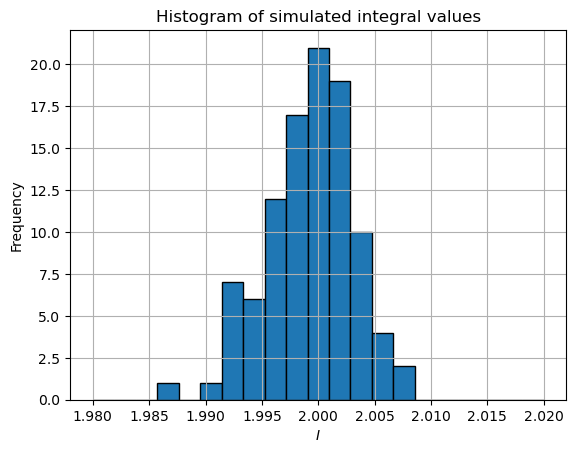

In [3]:
# Estimating sin(x) on the interval [0, pi] using Algorithm 1 for Monte Carlo Integration
sample_size = 100000

# values for the bounding box
a, b, c = 0, np.pi, 1

# function to be integrated
def f(x):
  return np.sin(x)

# number of computations for the integral
runs_number = 100
# array of experimental results
results = []

# running the algorithm multiple times and analysing the results
for step in range(runs_number):
  I = monte_carlo_integration_1(sample_size, a, b, c, f)
  results.append(I)

# print mean and standard deviation of results
print(f"Results after {runs_number} runs of the integration algorithm, each with a sample size of {sample_size}:")
print(f"Mean of the results: {np.mean(results)}")
print(f"Standard deviation: {np.std(results)}")

# histogram of results
plt.hist(results, range=[1.98, 2.02], bins=21, edgecolor='black')
plt.title('Histogram of simulated integral values')
plt.ylabel('Frequency')
plt.xlabel('$I$')
plt.grid()
plt.show()


# Algorithm 2: Improved Monte Carlo Integration
1. Choose any continuous distribution with given density $g(x)$ on the interval [a, b].
2. Generate a large number of variables $X_1, ..., X_n$ belonging to the chosen distribution.
3. Compute $\hat{\mathcal{I}}$ as the average of $f(X_i)/g(X_i)$
  $$ \hat{\mathcal{I}} = \frac{1}{n} \sum_{i=1}^n \frac{ f(X_i) }{ g(X_i) } $$

In particular, by choosing the uniform distribution as a starting distribution,
$$ g(x) = \frac{1}{b - a} $$
and sampling n points $ U_1, ..., U_n $ from this distribution, we get the result
$$ \hat{\mathcal{I}} = \frac{1}{n} \sum_{i=1}^n (b - a) f(X_i) $$

In [4]:
# Python implementation for Algorithm 2

def monte_carlo_integration_2(n, X, f, g):
  '''
  Returns the estimate for the integral using Algorithm 2 for Monte Carlo Integration
  Input:
    n - number of samples from the chosen distribution
    X - array of samples
    f - function to be integrated
    g - chosen density function
  '''
  # compute the two functions on the given samples
  f_X = np.array([f(x) for x in X])
  g_X = np.array([g(x) for x in X])

  # calculate f(X)/g(X) on the samples
  div_X = f_X / g_X

  #return the mean
  return np.mean(div_X)
  

## Example 2: Integrating the sine function
We will now approach the integral defined above using the improved Monte Carlo Integration algorithm and compare the results.
$$ I = \int_0^\pi \sin x \, dx $$
We choose to sample points from the Uniform distribution.

Results after 100 runs of the integration algorithm, each with a sample size of 100000:
Mean of the results: 2.0002510676597685
Standard deviation: 0.002600938333787489


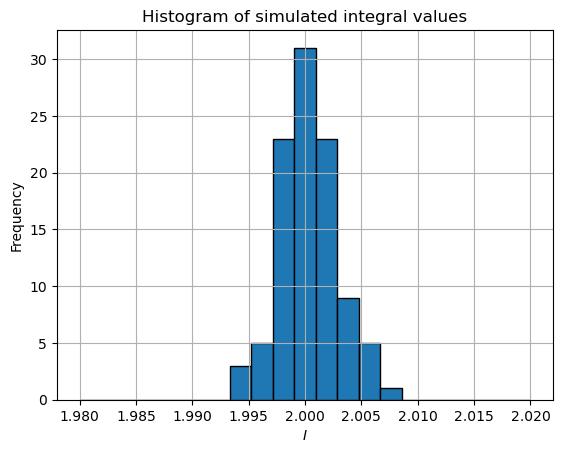

In [5]:
# Estimating sin(x) on the interval [0, pi] using Algorithm 2 for Monte Carlo Integration
sample_size = 100000

# values for the bounding box
a, b, c = 0, np.pi, 1

# function to be integrated
def f(x):
  return np.sin(x)

# density function of uniform distribution
def g(x):
  return 1 / (b - a)

# number of computations for the integral
runs_number = 100
# array of experimental results
results = []

# running the algorithm multiple times and analysing the results
for step in range(runs_number):
  # generating uniformly distributed samples on interval [a,b]
  X = np.random.uniform(a, b, size=sample_size)
  # generating the integral estimate
  I = monte_carlo_integration_2(sample_size, X, f, g)
  results.append(I)

# print mean and standard deviation of results
print(f"Results after {runs_number} runs of the integration algorithm, each with a sample size of {sample_size}:")
print(f"Mean of the results: {np.mean(results)}")
print(f"Standard deviation: {np.std(results)}")

# histogram of results
plt.hist(results, range=[1.98, 2.02], bins=21, edgecolor='black')
plt.title('Histogram of simulated integral values')
plt.ylabel('Frequency')
plt.xlabel('$I$')
plt.grid()
plt.show()

  

By comparing the results of the two algorithms on the same problem, we can see that Algorithm 2 has a better performance, in terms of:
- accuracy (closer to real integral value)
- consistency of results (lower standard deviation).